In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import time
import torch
from concurrent.futures import ThreadPoolExecutor, wait, as_completed
from torch.utils.data.dataset import Dataset
from tqdm import tqdm

METADATA_DIR = '../data/metadata/'
FACES_DIR = '../faces_pickled/'

%matplotlib inline

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [2]:
%%time

with open(FACES_DIR + 'FACES_PATHS.pickle', 'rb') as handle:
    FACES_PATHS = pickle.load(handle)

with open(FACES_DIR +'FACES_LABELS.pickle', 'rb') as handle:
    FACES_LABELS = pickle.load(handle)

len(FACES_PATHS), len(FACES_LABELS)

CPU times: user 140 ms, sys: 48 ms, total: 188 ms
Wall time: 188 ms


(1085181, 1085181)

In [4]:
faces_sample

array(['faces_saved/dcamvmuors/face_66.png',
       'faces_saved/nsifmpyfnq/face_265.png',
       'faces_saved/enoeecjnwh/face_232.png',
       'faces_saved/bnwxqegocz/face_132.png',
       'faces_saved/siedibyuqy/face_66.png'], dtype='<U35')

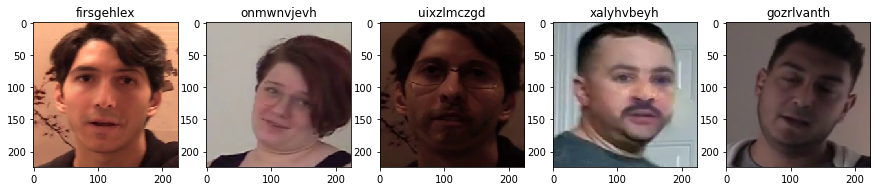

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
faces_sample = np.random.choice(FACES_PATHS, 5)
for i in range(len(faces_sample)):
    ax[i].set_title(faces_sample[i].split('/')[1])
    ax[i].imshow(cv2.cvtColor(cv2.imread('../' + faces_sample[i]), cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
print('Number of fake faces: {}/{} ({:.2f}%)'.format(sum(FACES_LABELS), len(FACES_LABELS), np.mean(FACES_LABELS) * 100))
print('Number of real faces: {}/{} ({:.2f}%)'.format(len(FACES_LABELS) - sum(FACES_LABELS), len(FACES_LABELS), (1 - np.mean(FACES_LABELS)) * 100))


Number of fake faces: 906249/1085181 (83.51%)
Number of real faces: 178932/1085181 (16.49%)


In [18]:
SAMPLE_LABELS = np.array(FACES_LABELS[:10000])
SAMPLE_FRAMES = np.array(FACES_PATHS[:10000])[SAMPLE_LABELS == 0]



In [21]:
SAMPLE_FRAMES

array(['faces_saved/aaragvjucp/face_232.png',
       'faces_saved/aaragvjucp/face_99.png',
       'faces_saved/aaragvjucp/face_166.png', ...,
       'faces_saved/kxpavclztu/face_33.png',
       'faces_saved/kxpavclztu/face_199.png',
       'faces_saved/kxpavclztu/face_299.png'], dtype='<U35')

In [10]:
import os
os.listdir('../faces/')[:10]

['wqeaqhefve.mp4',
 'mqeygjppbt.mp4',
 'ybabhnaoga.mp4',
 'pftfakmxpw.mp4',
 'txrsqajykv.mp4',
 'kpvwqqfzss.mp4',
 'hfsadwxfxh.mp4',
 'wzrkgntquh.mp4',
 'smwezpkhsn.mp4',
 'ftbqgzadge.mp4']

In [11]:
import json
JSONS_PATH = '../data/metadata/'
for js in os.listdir(JSONS_PATH):
    js = pd.read_json(JSONS_PATH + js)
    print(js.head())
        

               label        original  split  zip_no
aaragvjucp.mp4  REAL            None  train      17
aauzlyqkbj.mp4  FAKE  fdipsrizhu.mp4  train      17
ablakozzyi.mp4  FAKE  qtocjfadqh.mp4  train      17
abviavonpo.mp4  REAL            None  train      17
abvmydmmpd.mp4  FAKE  jkebjqkdee.mp4  train      17
               label        original  split  zip_no
aabkwhhgwv.mp4  FAKE  dyolakhvvw.mp4  train       7
aatzuimcwr.mp4  FAKE  hlxgwlqtde.mp4  train       7
abeibpdqhj.mp4  FAKE  kmbeaikclk.mp4  train       7
abeusommao.mp4  FAKE  pelfblynzg.mp4  train       7
abiotberut.mp4  FAKE  iwfqatwnfa.mp4  train       7
               label        original  split  zip_no
aavqiqgbzl.mp4  FAKE  mjqktsbgyj.mp4  train      30
abfcpgmncf.mp4  FAKE  qiuzeqtfjh.mp4  train      30
abvptajbyb.mp4  FAKE  ffoccujyxz.mp4  train      30
abxeyfzocf.mp4  FAKE  gpnkdexant.mp4  train      30
abxqiozuzu.mp4  FAKE  loqxlpjugj.mp4  train      30
               label        original  split  zip_no
aabyjxwqyo.m

               label        original  split  zip_no
aabmgfhcgg.mp4  FAKE  spdkvaocut.mp4  train      32
aakdoghgcp.mp4  FAKE  neaoqchkli.mp4  train      32
aanzlvzywt.mp4  FAKE  ytvnstdzze.mp4  train      32
aaooydetsr.mp4  FAKE  neaoqchkli.mp4  train      32
aarxilbppj.mp4  REAL            None  train      32
               label        original  split  zip_no
aachjwmgcr.mp4  FAKE  susbqdbdij.mp4  train      27
aajrvbynqc.mp4  REAL            None  train      27
aasrzgbdpp.mp4  REAL            None  train      27
abplofmgwg.mp4  REAL            None  train      27
absytkidsf.mp4  FAKE  fvhwprdodn.mp4  train      27
               label        original  split  zip_no
aaavbjopeq.mp4  FAKE  jdfuhwyyif.mp4  train      15
aaavflklag.mp4  FAKE  ndlaqefovy.mp4  train      15
abfzzvfkrx.mp4  FAKE  pwqcpexcoi.mp4  train      15
abnrklaglv.mp4  FAKE  mferfrsajs.mp4  train      15
abooilmuow.mp4  FAKE  mhjlktudzn.mp4  train      15
               label        original  split  zip_no
aaqaifqrwn.m

KeyboardInterrupt: 

In [ ]:
INDEXES = np.arange(50)
np.random.shuffle(INDEXES)

TRAIN

In [13]:
a = np.arange(50)
print(a)
np.random.shuffle(a)
print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[19  6 22  8 34 30 29 32 26 46 12 48 38 43 25 11  9 44  1 42 21 16 15 24
 47 17 45 33  0  4 18 40 20 41 39 35 31  7 36 49 13  5 28 37 27  3 10 14
 23  2]


In [31]:
js = pd.read_json(JSONS_PATH + 'metadata_01.json')

In [37]:
import json
JSONS_PATH = '../data/metadata/'
real, fake = [], []
for index, js in enumerate(os.listdir(JSONS_PATH)):
    js = pd.read_json(JSONS_PATH + js)
    real.append(js[js['label'] == 'REAL'].shape[0])
    fake.append(js[js['label'] == 'FAKE'].shape[0])

In [41]:
np.sum(sorted(real)[-24:])

10564

In [42]:
fake

[2009,
 2135,
 1739,
 2230,
 1905,
 3264,
 2126,
 1813,
 1693,
 1947,
 1918,
 1518,
 1914,
 2129,
 1920,
 3041,
 1448,
 1999,
 2242,
 1591,
 2026,
 2058,
 1984,
 1965,
 2329,
 2189,
 2041,
 1539,
 2261,
 1518,
 1904,
 1944,
 1875,
 1248,
 1975,
 1759,
 2813,
 2106,
 1748,
 2023,
 1818,
 2140,
 1884,
 2132,
 2347,
 2619,
 2119,
 1236,
 1696,
 2123]